In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

### **Завдання 14**  (10 балів)
Виберіть ті самі 5 колонки з **Завдання 9** з даних ([Data info (Ames housing dataset)](https://www.openml.org/d/42165)). Побудуйте на них дерево рішень, правильно обробивши дані перед цим. Підберіть параметри таким чином, щоб візуалізація дерева була максимально зрозуміла та корисна. Результати прокоментуйте. Які основні висновки можна винести з візуалізації?

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data[["OverallQual", "GrLivArea", "LotArea", "TotalBsmtSF", "HouseStyle"]]
target = housing.target

In [3]:
data = pd.get_dummies(data, columns = ['HouseStyle'])

In [4]:
data.head(5)

,OverallQual,GrLivArea,LotArea,TotalBsmtSF,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7.0,1710.0,8450.0,856.0,0,0,0,0,0,1,0,0
1,6.0,1262.0,9600.0,1262.0,0,0,1,0,0,0,0,0
2,7.0,1786.0,11250.0,920.0,0,0,0,0,0,1,0,0
3,7.0,1717.0,9550.0,756.0,0,0,0,0,0,1,0,0
4,8.0,2198.0,14260.0,1145.0,0,0,0,0,0,1,0,0


In [5]:
DecisionTreeRegressor?

In [6]:
predictors = [i for i in data.columns]

In [14]:
dt = DecisionTreeRegressor(max_depth = 5, criterion = 'squared_error', min_samples_split = 50)
dt.fit(data[predictors], target)

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

In [8]:
y_pred = dt.predict(data[predictors])

In [9]:
y_pred.mean()

180921.19589041098

In [10]:
target.mean()

180921.19589041095

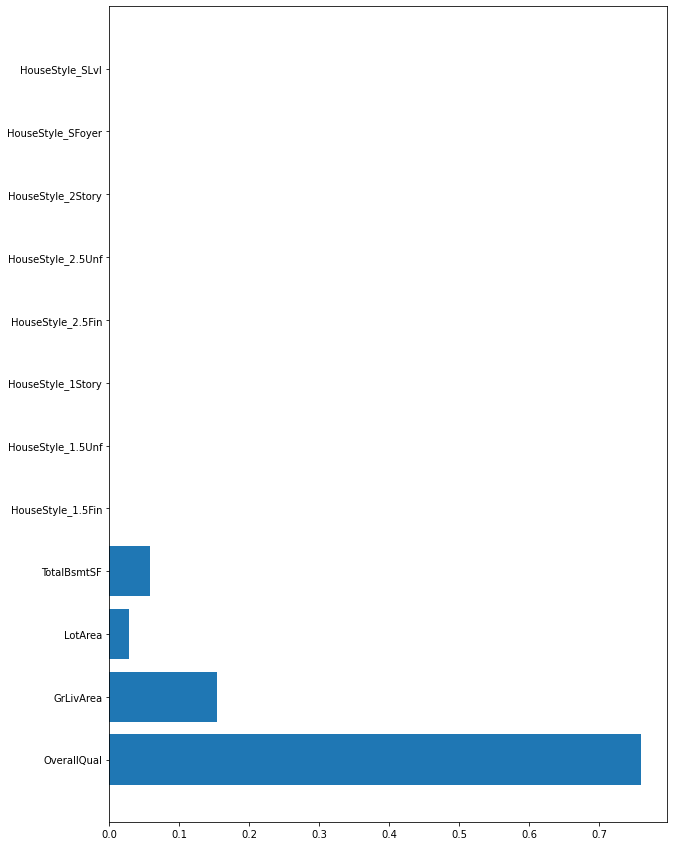

In [11]:
plt.figure(figsize = (10,15))
plt.barh(predictors, dt.feature_importances_)
plt.show()

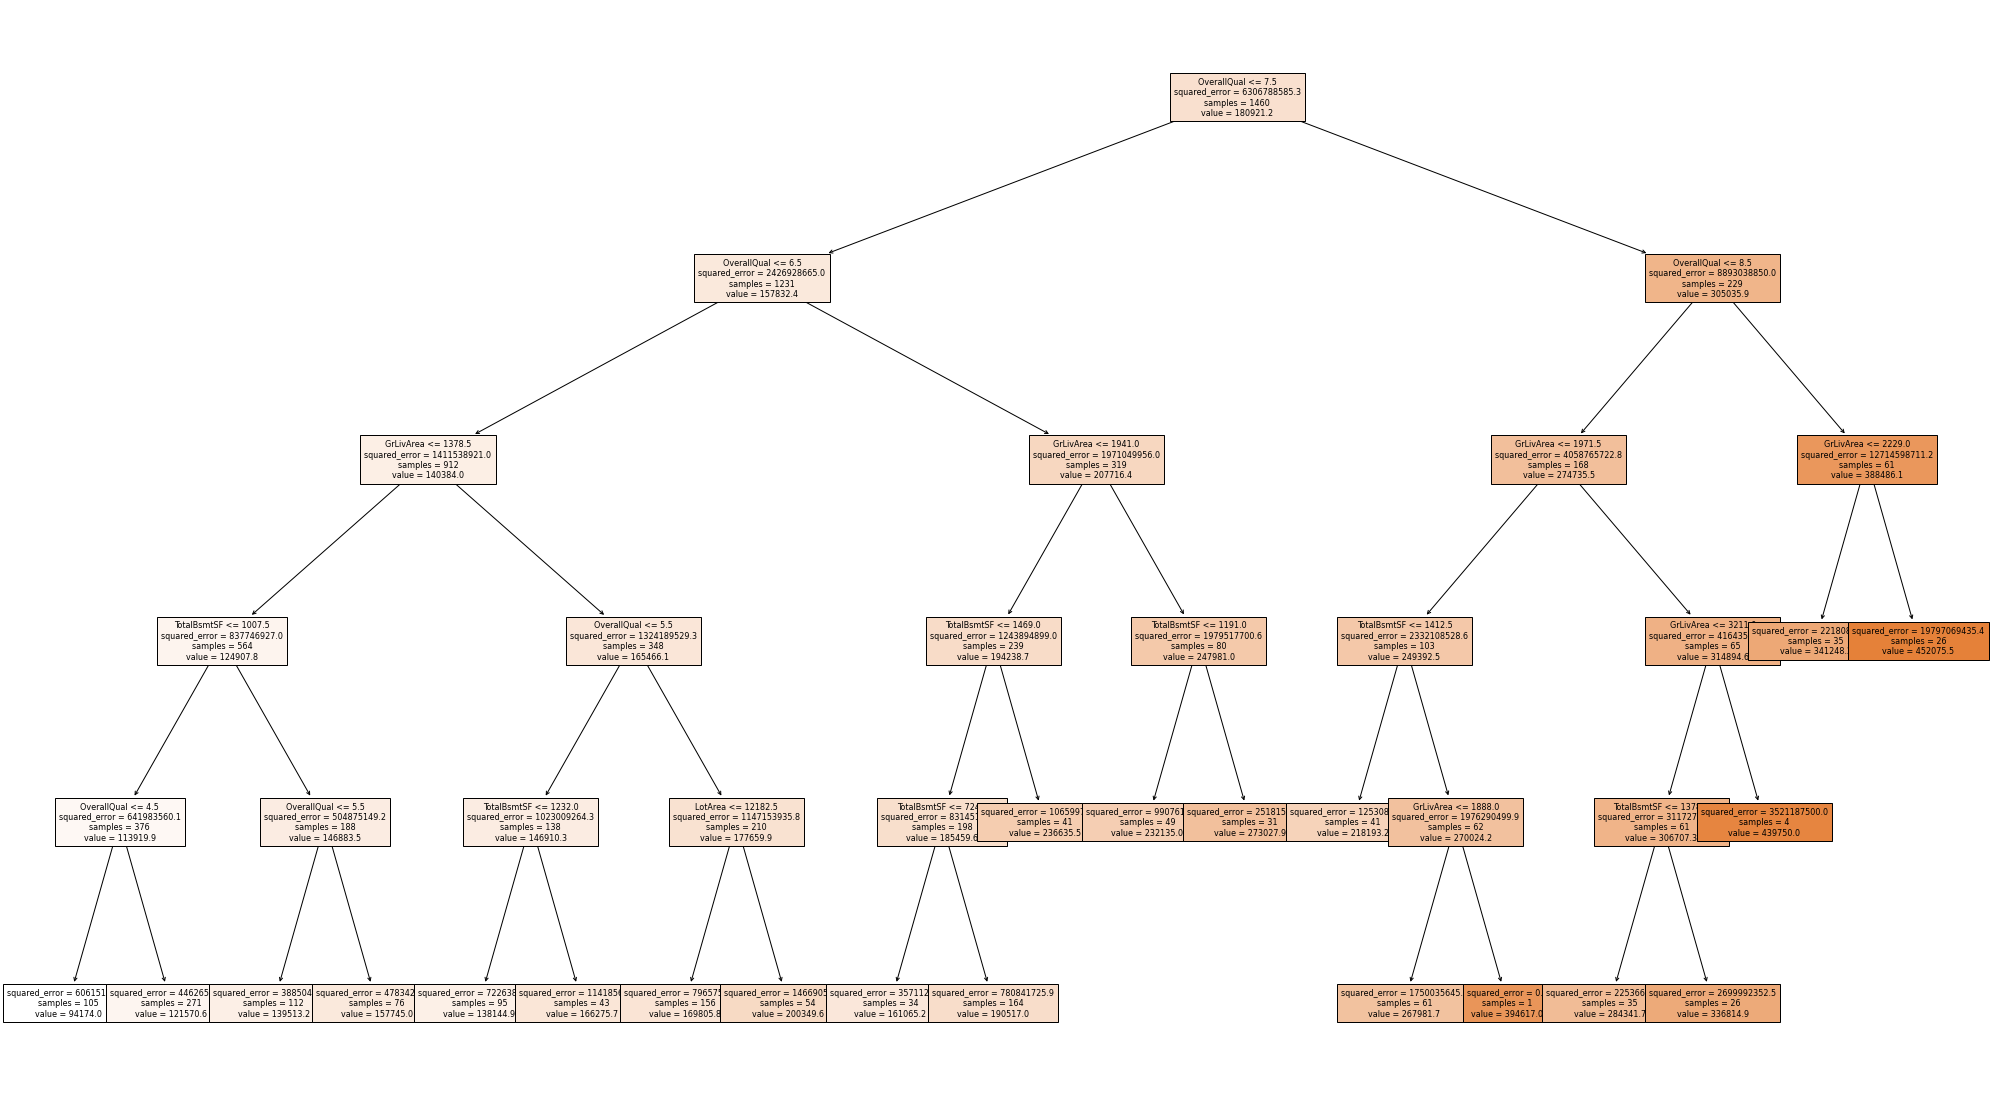

In [15]:
plt.figure(figsize = (35,20))
plot_tree(dt, filled = True, precision = 1, fontsize = 8,
          feature_names = predictors)
plt.show()

Загальна якість житла є найбільш корисним параметром для передбачення ціни. Також важливими є житлова площа та розміри підвального приміщення. Як і у результаті завдання 9, lotarea взагалі не є суттєвим параметром (з глибини 4 він зовсім відсутній у дереві).
Якщо якість будинку 7 і менше, то велика ймовірність, що ціна буде менше середнього (180921.2), якщо вона зменшуюється ще на один показник, то ціна також зменшується до 157832. Якщо ж якість будинку 7, але його житлова площа більша ніж 1941 футів, то це позитивно впливатиме на ціну, яка буде вища за середню (207716). Загалом, на ціну спочатку впливає показник якості, але велика житлова площа може підвищувати її, навіть у випадках, коли якість менша. Коли ж якість більше 8, або менше 7, житлова та підвальна площа краще передбачають вартість.

Також ще спробувала зробити графік регресії за одним параметром. У ньому видно, що прогноз добре відображає вартість з 5 рівня якості. На менших рівнях він схильний перебільшувати вартість.

In [5]:
x = data[['OverallQual']].values
y = target.values

In [6]:
sort_idx = x.flatten().argsort()
x = x[sort_idx]
y = y[sort_idx]

In [7]:
tree = DecisionTreeRegressor(criterion='mse',
                             max_depth=3)         
tree.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=3)

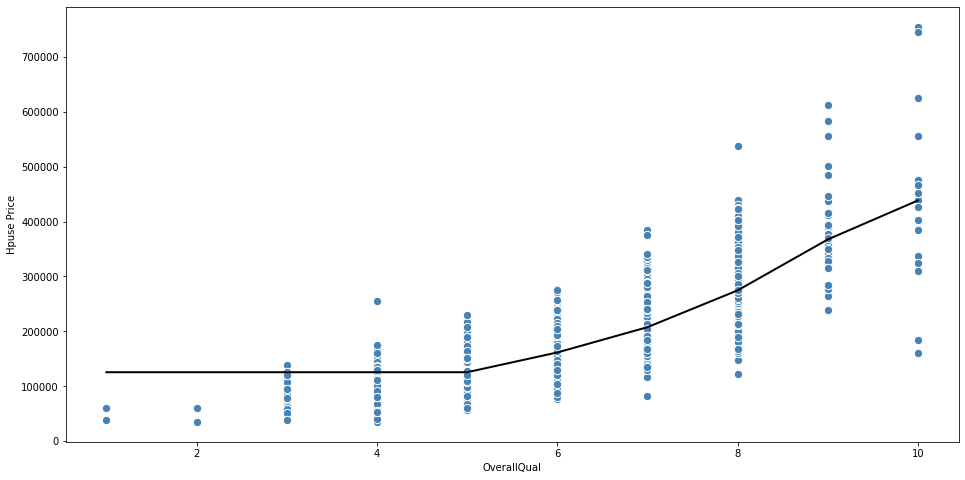

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='steelblue',  
            edgecolor='white', s=70)
plt.plot(x, tree.predict(x),
         color='black', lw=2)
plt.xlabel('OverallQual')
plt.ylabel('Hpuse Price')
plt.show()

### **Завдання 15**  (5 балів)

Поміряйте MSE та MAE для прогнозів дерева рішень. Порівняйте їх з отриманими метриками з **Завдання 9**. Якщо **Завдання 9** не було виконане, тоді просто інтерпретатуйте отримане MAE.

In [19]:
def your_mse_function(y_t, y_p):
  mse = np.square(np.subtract(y_t, y_p)).mean()
  return mse

def your_mae_function(y_t, y_p):
  mae = np.mean(np.abs(y_t - y_p))
  return mae


In [22]:
np.array(y_pred)

array([190516.98780488, 157745.02631579, 190516.98780488, ...,
       240800.46875   , 139513.17857143, 139513.17857143])

In [26]:
print('MSE: ' + str(your_mse_function(np.array(target), np.array(y_pred))))
print('MAE: ' + str(your_mae_function(np.array(target), np.array(y_pred))))

MSE: 910330979.162882
MAE: 22135.448504776017


Показники MSE і MAE тут значно менші ніж у моделі лінійної регрессії, що свідчить про більшу точність моделі дерев рішень у прогнозуванні вартості ділянок. Якщо у першій (з цими ж параметрами) MAE дорівнювало 22573, то у другій - вже 22135.
Проте, в обидвох випадках показники мені здаються надто високими для того, щоб стверджувати, що модель успішно прогнозує дані